<a href="https://colab.research.google.com/github/AntTranAnt/CS4372_HW1/blob/main/CS4372_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

**2.1 Pre-Processing**

In [2]:
url = "https://raw.githubusercontent.com/AntTranAnt/CS4372_HW1/main/hour.csv"
df = pd.read_csv(url, delimiter=',')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#Drop any rows with null or NA values
df = df.dropna()

#Drop any duplicate rows
df = df.drop_duplicates()

#Convert date to integer
df['dteday'] = pd.to_datetime(df['dteday']) #change str to datetime
df['dteday'] = df['dteday'].apply(lambda x: x.toordinal()) #Change datetime to numeric

#Split attributes and output
y = df['cnt']
x = df.drop('cnt', axis=1)

#Standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [6]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<Axes: >

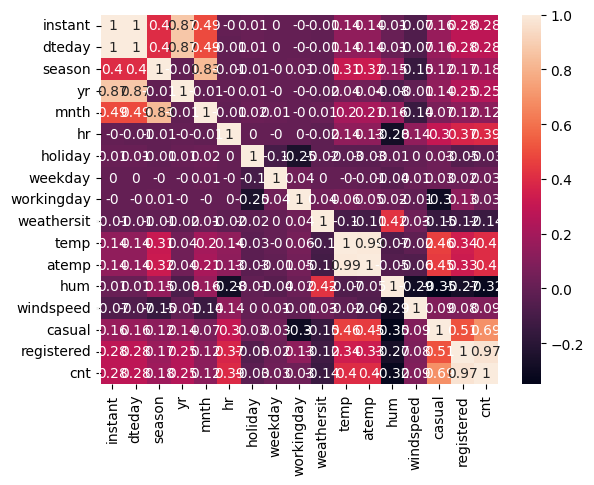

In [7]:
#Look at heatmap
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
#registered, casual, temp, atemp has highest correlation
features = ['registered', 'casual', 'temp', 'atemp']
x = x_scaled[features]

#80/20 test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

In [14]:
#Create model with parameters
max_iter = 20000
eta0 = 0.0001
alpha = 0.1
early_stopping = False
random_state = 23

sgd = SGDRegressor(max_iter=max_iter, eta0=eta0, early_stopping=early_stopping, random_state=random_state)
sgd.fit(x_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=20000, random_state=23)

In [15]:
#print results
y_pred = sgd.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
ev = explained_variance_score(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
#Training set testing
print('Model performance for: max_iter=' + str(max_iter) + ', eta0=' + str(eta0) + ', alpha=' + str(alpha) + ', early_stopping=' + str(early_stopping))
print('--------------------------------------------------------------------------------')
print('Training set:')
print("MSE: " + str(mse))
print("MAE: " + str(mae))
print("EV: " + str(ev))
print("R2: " + str(r2))

#Testing set testing
y_pred = sgd.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Training set testing
print('Testing set:')
print("MSE: " + str(mse))
print("MAE: " + str(mae))
print("EV: " + str(ev))
print("R2: " + str(r2))

Model performance for: max_iter=20000, eta0=0.0001, alpha=0.1, early_stopping=False
--------------------------------------------------------------------------------
Training set:
MSE: 0.057258806892112185
MAE: 0.15225642418248742
EV: 0.9999982661698463
R2: 0.9999982653885877
Testing set:
MSE: 0.05266008966031164
MAE: 0.1463635029201678
EV: 0.9999983809202384
R2: 0.999998377626063


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**OLS**

In [ ]:
import statsmodels.api as sm

x = df.drop('cnt', axis=1)
y = df['cnt']


In [ ]:
x.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,4,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,5,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [ ]:
features = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'hum', 'windspeed', 'registered', 'casual', 'temp', 'atemp']
x = x[features]

In [ ]:
x = sm.add_constant(x)

In [ ]:
x.head()

,const,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,registered,casual,temp,atemp
0,1.0,1,734138,1,0,1,0,0,6,0,1,0.81,0.0,13,3,0.24,0.2879
1,1.0,2,734138,1,0,1,1,0,6,0,1,0.80,0.0,32,8,0.22,0.2727
2,1.0,3,734138,1,0,1,2,0,6,0,1,0.80,0.0,27,5,0.22,0.2727
3,1.0,4,734138,1,0,1,3,0,6,0,1,0.75,0.0,10,3,0.24,0.2879
4,1.0,5,734138,1,0,1,4,0,6,0,1,0.75,0.0,1,0,0.24,0.2879


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

In [ ]:
mod = sm.OLS(y_train, x_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.666e+26
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:23:01   Log-Likelihood:             2.8611e+05
No. Observations:               13903   AIC:                        -5.722e+05
Df Residuals:                   13886   BIC:                        -5.721e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.094e-10   3.12e-06     -0.000      1.0

Now adding features that increase the R-squared value (excluding registered as it overfits the data)
---



In [ ]:
x = df.drop('cnt', axis=1)
y = df['cnt']

features = ['casual', 'temp', 'workingday', 'season', 'dteday', 'yr', 'hr', 'holiday', 'weathersit',
            'hum']
x = x[features]

x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

mod = sm.OLS(y_train, x_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1985.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:27:09   Log-Likelihood:                -85489.
No. Observations:               13903   AIC:                         1.710e+05
Df Residuals:                   13891   BIC:                         1.711e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2682.5050    1.2e+04      0.223      0.8

Again, Removing p values greater than 0.05 as they are not significant. Also removed low t values as they don't affect r squared much

In [ ]:
x = df.drop('cnt', axis=1)
y = df['cnt']

features = ['casual', 'workingday', 'season', 'yr', 'hr']
x = x[features]

x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

mod = sm.OLS(y_train, x_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4295.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:37:29   Log-Likelihood:                -85560.
No. Observations:               13903   AIC:                         1.711e+05
Df Residuals:                   13897   BIC:                         1.712e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -86.5076      3.366    -25.703      0.0

In [ ]:
y_test_predict = res.predict(x_test)
sm.tools.eval_measures.rmse(y_test, y_test_predict)

113.66562900491788

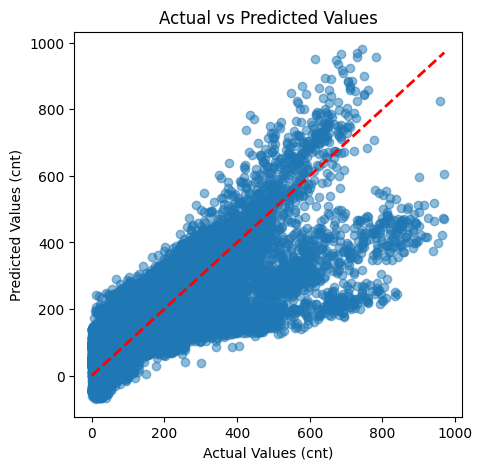

In [ ]:
import matplotlib.pyplot as plt
y_train_pred = res.predict(x_train)

# Plotting Actual vs Predicted
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values (cnt)')
plt.ylabel('Predicted Values (cnt)')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4295.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:55:15   Log-Likelihood:                -85560.
No. Observations:               13903   AIC:                         1.711e+05
Df Residuals:                   13897   BIC:                         1.712e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -86.5076      3.366    -25.703      0.0

R-Squared and Adjusted R-Squared
*   The model explains 60.7& of the variance in the target vairable
*   Strong indication that model explains a significant portion of variability

F-statistic
*   F statistic is high (equal to 4295) This means this model is a much better fit than the null model
*   Model siginifcantly reduces residual sum error

Intercept (const)
* If all independent variables are 0, the predicted value of cnt is -86.51. not much real world interpretation


Coefficients
* Is the value of the weight.
* casual = 2.4445 means that every unit increase, cnt increased by 2.44 units
* workingday = 90.1349 means that for every unit increase, cnt increases by 90.13
* season = 15.8006 means that for every unit increase, cnt increases by 18.80
* yr = 56.9681 means that for every unit increase, cnt increases by 56.97
* hr = 5.1247 means that for every unit increase, cnt increases by 5.12

Standard Error (std err)
* Measures accuracy of coefficient estimate/confidence of point approximation
* We want std err to be low (which it is for all features)
* Std err for:
  * casual: 0.022. Coefficient estimate can vary by about 0.022
  * workingday: 2.189. Coefficient estimate can vary by about 2.189
  * season: 0.881. Coefficient estimate can vary by about 0.881
  * yr: 1.959. Coefficient estimate can vary by about 1.959
  * hr: 0.148. Coefficient estimate can vary by about 0.148

P-value
* Probability of obtaining the t value by chance
* want p value to be small
* Since all p values are 0 (or close to 0) it indiates all features are statistically significant in predicting cnt

T-value
* is coefficient / stderr
* Want this value to be high to measure how storng the evidence is against the null hypothesis
* All t values are high in the model summary.
* confirms that the predictors are highly statistically significant